In [1]:
import os
import sys
AbsPath = os.path.abspath("")
sys.path.append(AbsPath+"/../..")
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from Functions import Functions as F
from SFR_Fun_CE import *
import hmf
from itertools import cycle
import pandas as pd
from Scripts.Plots import SDSS_Plots
import scipy.interpolate as inter
import pickle
Add_SDSS = SDSS_Plots.SDSS_Plots(11.5,15,0.1) #pass this halomass:min, max, and binwidth for amting 

HM_Min = 10; HM_Max = 15

#gets the HMF interpolation function
HMF_fun = F.Make_HMF_Interp()
Cosmo =cosmology.getCurrent()
h = Cosmo.h

#set plot paramaters here
mpl.rcParams.update(mpl.rcParamsDefault)
#Abundance Matching Parameters
#Abundance Matching Parameters
Override =\
{\
'M10':11.95,\
'SHMnorm10':0.03,\
'beta10':1.6,\
'gamma10':0.7,\
'M11':0.5,\
'SHMnorm11':-0.01,\
'beta11':-0.6,\
'gamma11':0.1\
}

AbnMtch =\
{\
'Behroozi13': False,\
'Behroozi18': False,\
'B18c':False,\
'B18t':False,\
'G18':False,\
'G18_notSE':False,\
'G19_SE':False,\
'G19_cMod':False,\
'Lorenzo18':False,\
'Moster': False,\
'Moster10': False,\
'Illustris': False,\
'z_Evo':True,\
'Scatter': 0.11,\
'Override_0': False,\
'Override_z': False,\
'Override': Override,\
'PFT': False,\
'M_PFT1': False,\
'M_PFT2': False,\
'M_PFT3': False,\
'N_PFT1': False,\
'N_PFT2': False,\
'N_PFT3': False,\
'b_PFT1': False,\
'b_PFT2': False,\
'b_PFT3': False,\
'g_PFT1': False,\
'g_PFT2': False,\
'g_PFT3': False,\
'g_PFT4': False\
}

Paramaters = \
{\
'AbnMtch' : AbnMtch,\
'AltDynamicalTime': 1,\
'NormRnd': 0.5,\
'SFR_Model': 'CE'\
}

#macc/M0
Unevolved = {\
'gamma' : 0.22,\
'alpha' : -0.91,\
'beta' : 6,\
'omega' : 3,\
'a' : 1,\
}

A1
[-0.22425749  1.59296573 -2.94008928  1.87508097]
A1_m
[ 1.57894737 -3.13157895]
A2
[0.14850128 0.85151025]
B
[-0.08073828 -0.06940528  1.1529857   0.30233837]


/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


FRACKSKY= 0.1404020420493216


/data/pg1g15/Side_Projects/Analytic_DM_Model/SDSS_Plots.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.df_cent.loc[self.Photomotry] = self.df_cent[self.Photomotry] + 0.025
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: Matplo

In [3]:
#loads the tdyn = 1 subhalo mass fucntion from steel
Subhalos = np.loadtxt("./Subhalos/Surviving_Subhalos1.0.dat")
SubMass = Subhalos[0][1:]
z_Sub = Subhalos[:,0][1:]
z_SMF = z_Sub
sSHMF = Subhalos[1:,1:]

#Directory to go looking in
#Factor_Stripping_SF = (1.0, False, False, True, 'CE', 'G19_SE')
Factor_Stripping_SF = (1.0, True, False, True, 'CE', 'G19_cMod')
Dir = "./DataOutput/RunParam_{}/".format("".join(("{}_".format(i) for i in Factor_Stripping_SF)))
AvaHaloMass_G18 = np.load(Dir + "SMFhz_AvaHaloMass.npy")
SMF_G18 = np.load(Dir + "SMFhz_AnalyticalModel_SMF_Highz.npy")
SMF_MassRange_G18 = np.load(Dir + "SMFhz_Surviving_Sat_SMF_MassRange.npy")

#Sets the SMHM relation to be used
AbnMtch[Factor_Stripping_SF[5]] = True
if "PFT" in Factor_Stripping_SF[5]:
    AbnMtch["PFT"] = True

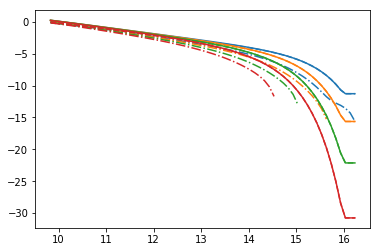

In [4]:
#Check the HMF/THMF at multiple redshifts
colours = ["C0", "C1", "C2", "C3"]
colourcycler = cycle(colours)
for z_in in [0, 0.5, 1.0, 1.5]:
    colour = next(colourcycler)
    plt.plot(SubMass, np.log10(HMF_fun(SubMass, z_in) + sSHMF[np.digitize(z_in, bins = z_Sub)]), "-", label = "Total", color = colour)
    plt.plot(SubMass, np.log10(HMF_fun(SubMass, z_in)), "--", label = "Cent", color = colour)
    plt.plot(SubMass, np.log10(sSHMF[np.digitize(z_in, bins = z_Sub)]), "-.", label = "Sub", color = colour)
    

In [5]:
def Return_Cent_SMF(z_in, SMF_X = np.arange(7, 14, 0.01), SMF_X_Bin = 0.01, Cent_Tot = 'Cent'): 
    HM_Bin = 0.01
    HM_Range = np.arange(8, 16, HM_Bin)
    if Cent_Tot == 'Cent':
        cSMF_X, cSMF_Y = F.DM_to_SM(SMF_X, np.log10(HMF_fun(HM_Range, z_in)), HM_Range, HM_Bin, SMF_X_Bin, Paramaters, Redshift = z_in, N = 5000)    
        return cSMF_X, cSMF_Y, SMF_X_Bin
    elif Cent_Tot == 'Tot':
        HM_Bin = SubMass[1] - SubMass[0]        
        cSMF_X, tSMF_Y = F.DM_to_SM(SMF_X, np.log10(HMF_fun(SubMass, z_in) + sSHMF[np.digitize(z_in, bins = z_Sub)]), SubMass, HM_Bin, SMF_X_Bin, Paramaters, Redshift = z_in, N = 5000)
        return cSMF_X, tSMF_Y, SMF_X_Bin
    elif Cent_Tot == 'Tot_ME':
        z_bin = np.digitize(z_in, bins = z_SMF)
        sSMF_Y = SMF_G18[z_bin]
        SMF_X_Bin = SMF_MassRange_G18[1] - SMF_MassRange_G18[0]
        cSMF_X, cSMF_Y = F.DM_to_SM(SMF_MassRange_G18, np.log10(HMF_fun(HM_Range, z_in)), HM_Range, HM_Bin, SMF_X_Bin, Paramaters, Redshift = z_in, N = 5000)    
        tSMF_Y = np.log10(np.power(10, cSMF_Y),+ sSMF_Y)
        return cSMF_X, tSMF_Y, SMF_X_Bin

def Return_Cum_SMF(z_in, Cent_Tot = 'Cent'):
    SMF_X_Bin = 0.1
    SMF_X = np.arange(7, 14, SMF_X_Bin)
    SMF_X, cSMF_Y, SMF_X_Bin = Return_Cent_SMF(z_in, SMF_X = SMF_X, SMF_X_Bin = SMF_X_Bin, Cent_Tot = Cent_Tot)
    cSMF_Y_Cum = np.flip(np.cumsum(np.flip(np.power(10, cSMF_Y), 0)), 0)*SMF_X_Bin
    return SMF_X, cSMF_Y_Cum

In [6]:
Paramaters

{'AbnMtch': {'Behroozi13': False,
  'Behroozi18': False,
  'B18c': False,
  'B18t': False,
  'G18': False,
  'G18_notSE': False,
  'G19_SE': False,
  'G19_cMod': True,
  'Lorenzo18': False,
  'Moster': False,
  'Moster10': False,
  'Illustris': False,
  'z_Evo': True,
  'Scatter': 0.11,
  'Override_0': False,
  'Override_z': False,
  'Override': {'M10': 11.95,
   'SHMnorm10': 0.03,
   'beta10': 1.6,
   'gamma10': 0.7,
   'M11': 0.5,
   'SHMnorm11': -0.01,
   'beta11': -0.6,
   'gamma11': 0.1},
  'PFT': False,
  'M_PFT1': False,
  'M_PFT2': False,
  'M_PFT3': False,
  'N_PFT1': False,
  'N_PFT2': False,
  'N_PFT3': False,
  'b_PFT1': False,
  'b_PFT2': False,
  'b_PFT3': False,
  'g_PFT1': False,
  'g_PFT2': False,
  'g_PFT3': False,
  'g_PFT4': False},
 'AltDynamicalTime': 1,
 'NormRnd': 0.5,
 'SFR_Model': 'CE'}

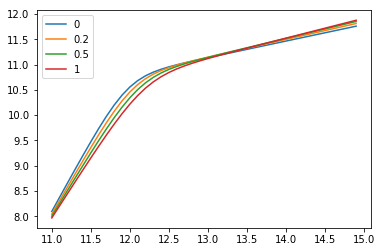

In [7]:
DarkMatter = np.arange(11, 15, 0.1)
for i in [0, 0.2, 0.5, 1]:
    SM = F.DarkMatterToStellarMass(DarkMatter, i, Paramaters, ScatterOn = False)
    plt.plot(DarkMatter, SM, label = i)
plt.legend()
plt.show()

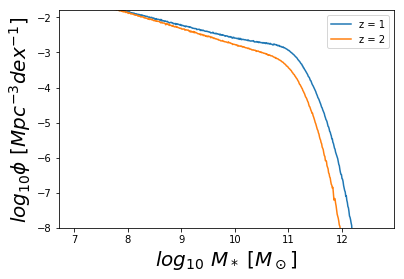

In [8]:
z_arr = [1, 2]
for i in z_arr:
    X, Y, Bin = Return_Cent_SMF(i, Cent_Tot = "Cent")
    plt.plot(X, Y, label = "z = {}".format(i))
plt.legend()
plt.ylim(-8, -1.8)
plt.xlabel("$log_{10}$ $M_*$ [$M_\odot$]", fontproperties = mpl.font_manager.FontProperties(size = 20))
plt.ylabel("$log_{10}  \phi$ $[Mpc^{-3} dex^{-1}]$", fontproperties = mpl.font_manager.FontProperties(size = 20))
plt.show()

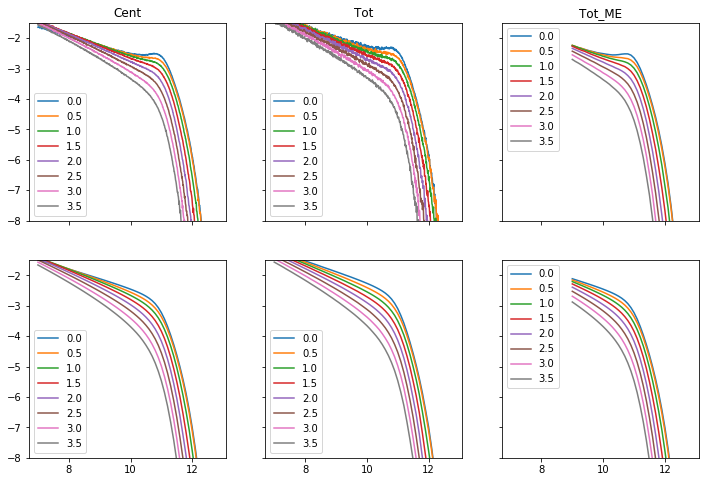

In [9]:
f, SubPlots = plt.subplots(2, 3, figsize = (12,8), sharex = True ,sharey = True)
z_arr = np.arange(0, 4, 0.5)
for i in z_arr:
    X, Y, Bin = Return_Cent_SMF(i, Cent_Tot = "Cent")
    SubPlots[0][0].plot(X, Y, label = i)
SubPlots[0][0].legend()
SubPlots[0][0].set_title("Cent")
for i in z_arr:
    X, Y = Return_Cum_SMF(i, Cent_Tot = "Cent")
    SubPlots[1][0].plot(X, np.log10(Y), label = i)
SubPlots[1][0].legend()

for i in z_arr:
    X, Y, Bin = Return_Cent_SMF(i, Cent_Tot = "Tot")
    SubPlots[0][1].plot(X, Y, label = i)
SubPlots[0][1].legend()
SubPlots[0][1].set_title("Tot")
for i in z_arr:
    X, Y = Return_Cum_SMF(i, Cent_Tot = "Tot")
    SubPlots[1][1].plot(X, np.log10(Y), label = i)
SubPlots[1][1].legend()

for i in z_arr:
    X, Y, Bin = Return_Cent_SMF(i, Cent_Tot = "Tot_ME")
    SubPlots[0][2].plot(X, Y, label = i)
SubPlots[0][2].legend()
SubPlots[0][2].set_title("Tot_ME")
for i in z_arr:
    X, Y = Return_Cum_SMF(i, Cent_Tot = "Tot_ME")
    SubPlots[1][2].plot(X, np.log10(Y), label = i)
SubPlots[1][2].legend()

SubPlots[1][2].set_ylim(-8, -1.5)

plt.show()

#This is the 'Splines on splines' code
z = np.arange(0, 2.1, 0.2)
t = Cosmo.lookbackTime(z)
phi_range = np.arange(-8, -2, 0.01)
interps_out = []
for i in z:
    X, Y = Return_Cum_SMF(i, Cent_Tot = 'Cent')
    Fun = inter.interp1d(np.log10(Y), X)
    interps_out.append(Fun(phi_range))
Fun_2d =  inter.interp2d(phi_range, z, np.array(interps_out))

(600,) (20,) (20, 600)
1400 695 697 8


/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


TypeError: StarFormationRate() missing 1 required positional argument: 'Parameters'

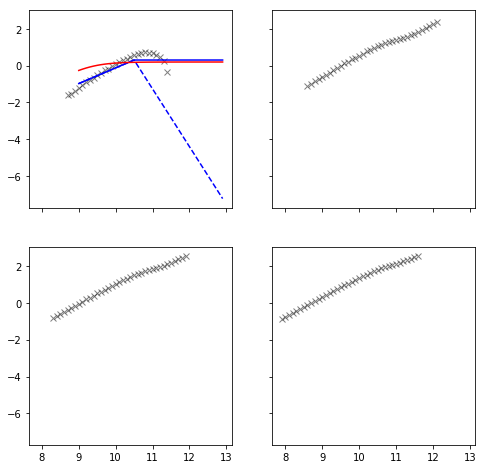

In [10]:
f, SubPlots = plt.subplots(2, 2, figsize = (8,8), sharex = True ,sharey = True)
z = np.arange(0, 4, 0.2)
Print_Floor = 5
t = Cosmo.lookbackTime(z)
phi_range = np.arange(-8.0, -2.0, 0.01)

MR_Corr = 0.41 #Madau and Dickinson Instaneous recycling of a chabreir IMF


#Do this For centrals
interps_out = []
for i in z:
    try:
        X_Cen, Y = Return_Cum_SMF(i, Cent_Tot = 'Cent')
        Fun = inter.interp1d(np.log10(Y), X_Cen)
        interps_out.append(Fun(phi_range))
    except Exception as e:
        print(e)
        print(i, phi_range)
print(np.shape(phi_range), np.shape(z), np.shape(np.array(interps_out)))
Fun_2d =  inter.interp2d(phi_range, z, np.array(interps_out))

SFRs_Cen = np.zeros((len(z), len(X_Cen)))
delta_t = t[:-1]-t[1:]
for i, phi in enumerate(phi_range):
    MassGrowth = Fun_2d(phi, z)[:,0]
    Delta_M = np.power(10,MassGrowth[:-1])-np.power(10,MassGrowth[1:])
    SFR_yr = (Delta_M/(1-MR_Corr))/np.abs(delta_t*(10**9))
    Bins_M = np.digitize(MassGrowth[:-1], bins = X_Cen)
    ix = [np.arange(0, len(z)-1), Bins_M]
    SFRs_Cen[ix] = SFR_yr

print(len((SFRs_Cen).flatten()), len((SFRs_Cen[SFRs_Cen == 0]).flatten()), len((SFRs_Cen[SFRs_Cen > 0]).flatten()), len((SFRs_Cen[SFRs_Cen < 0]).flatten()))

x, y, = 0, 0
for j, SFR in enumerate(SFRs_Cen):
    if j%Print_Floor == 0:
        SubPlots[y][x].plot(X_Cen, np.log10(SFR), "xk",label = "MyDataCent", alpha = 0.5)    
        x+=1
        if x > 1:
            x=0
            y+=1
            
#Add other starformation rates  
x, y, = 0, 0
for j, SFR in enumerate(SFRs_Cen):
    if j%Print_Floor == 0:
        SubPlots[y][x].plot(X, Leija15(X, z = z[j]), "-b", label = "L15")
        SubPlots[y][x].plot(X, Leija15_mergers(X, z = z[j]), "--b", label = "L15_Mergers")       
        SubPlots[y][x].plot(X, SFR_t(X, z = z[j]), "-r", label = "T16")
        SubPlots[y][x].plot(X, F.StarFormationRate(X, z = z[j]), "-.g", label = "S16")
        
        
        SubPlots[y][x].set_title("z =" +str(z[j]))
        x+=1
        if x > 1:
            x=0
            y+=1
SubPlots[0][0].set_ylim(-4, 2.5)
SubPlots[1][1].legend(ncol =4, loc = 4)
SubPlots[1][0].set_xlabel("$M_* [M_{\odot}]$")
SubPlots[0][0].set_ylabel("$log_{10} SFR [M_{\odot} yr^{-1}]$")
SubPlots[1][1].set_xlabel("$M_* [M_{\odot}]$")
SubPlots[1][0].set_ylabel("$log_{10} SFR [M_{\odot} yr^{-1}]$")
plt.show()

In [14]:
def SFR_t_fit(M_out, z = 0.5):
    s0 = 0.6+ 1.22*(z) - 0.2*(z**2)
    logM0 = 10.3 + 0.753*(z) - 0.15*(z**2)
    
    
    Gamma = -(1.3 - 0.1*(z))# + 0.05*(z**2))#including -ve here to avoid it later
    
    
    log10MperY = s0 - np.log10(1 + np.power(np.power(10, (M_out - logM0) ), Gamma))
    return log10MperY

def SFR_t_alt(M_out, z = 0.5):
    s0 = 0.6+ 1.22*(z) - 0.143*(z**2)#- 0.2*(z**2)
    logM0 = 10.3 + 0.753*(z) - 0.15*(z**2)
    
    
    Gamma = -(1.3 - 0.1*(z))# + 0.05*(z**2))#including -ve here to avoid it later
    
    
    log10MperY = s0 - np.log10(1 + np.power(np.power(10, (M_out - logM0) ), Gamma))
    return log10MperY

In [12]:
def SFR_s_fit(SM, z):
    """
    Calculates Starformation rate
    Args:
    SM: Stellar Mass [log10 Msun]
    z: Redshift
    Returns:
    SFR: Star formation rate [log10 Msun yr-1]
    """
        m = SM-9; r = np.log10(1+z)
        m0, a0, a1, m1, a2 = 0.5, 1.5, 0.3, 0.36, 2.5
        Max = m-m1-a2*r
        Max[Max<0] = 0
        log10MperY = m-m0+a0*r-a1*np.power(Max, 2)
    #Schreiber 2015
    m = SM-9; r = np.log10(1+z)
    m0, a0, a1, m1, a2 = 0.75, 1.75, 0.3, 0.36, 1.75 # 0.5 (up down), 1.5(z up down), 0.3 (bend left right), 0.36 (bend tightness), 2.5 (bend tightness z)
    Max = m-m1-a2*r
    Max[Max<0] = 0
    return m-m0+a0*r-a1*np.power(Max, 2)

In [4]:
def SFR_ill_fit(M_out, z = 0.5):
    s0 = 0.6+ 1.22*(z) - 0.2*(z**2)
    logM0 = 10.7 + 0.5*(z) - 0.09*(z**2)
    Gamma = -(1.6 - 0.25*(z) + 0.01*(z**2))#including -ve here to avoid it later
    log10MperY = s0 - np.log10(1 + np.power(np.power(10, (M_out - logM0) ), Gamma))
    return log10MperY

In [14]:
def SFR_cMod_fit(M_out, z = 0.5):
    s0 = 0.6+ 1.22*(z) - 0.2*(z**2)
    logM0 = 10.7 + 0.5*(z) - 0.09*(z**2)
    Gamma = -(1.6 - 0.25*(z) + 0.01*(z**2))#including -ve here to avoid it later
    log10MperY = s0 - np.log10(1 + np.power(np.power(10, (M_out - logM0) ), Gamma))
    return log10MperY

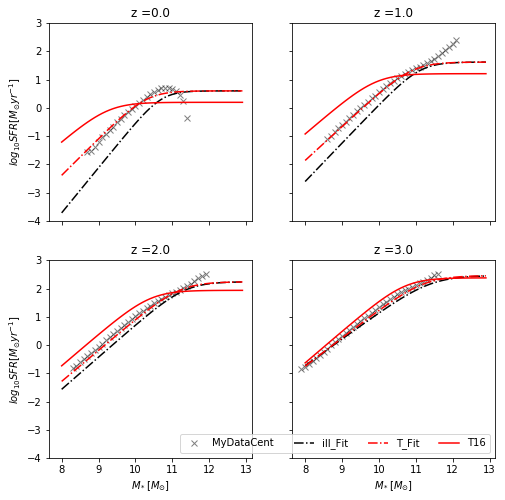

In [15]:
Print_Floor = 5
f, SubPlots = plt.subplots(2, 2, figsize = (8,8), sharex = True ,sharey = True)
X = np.arange(8, 13, 0.1)
x, y, = 0, 0
for j, SFR in enumerate(SFRs_Cen):
    if j%Print_Floor == 0:
        #Fit = np.polyfit(X[:Tenptfivebin][SFR[:Tenptfivebin]>0], np.log10(SFR[:Tenptfivebin][SFR[:Tenptfivebin]>0]), 1)
        #SubPlots[y][x].plot(X[:Tenptfivebin], Fit[0]*X[:Tenptfivebin] + Fit[1], "-k", label = "MyFitCentral")
        #Fit = np.polyfit(X[Tenptfivebin:][SFR[Tenptfivebin:]>0], np.log10(SFR[Tenptfivebin:][SFR[Tenptfivebin:]>0]), 1)
        #SubPlots[y][x].plot(X[Tenptfivebin:], Fit[0]*X[Tenptfivebin:] + Fit[1], "-k", label = "MyFitCentral")
        SubPlots[y][x].plot(X_Cen, np.log10(SFR), "xk",label = "MyDataCent", alpha = 0.5)    
        
        #Add other starformation rates 
        SubPlots[y][x].plot(X, SFR_ill_fit(X, z = z[j]), "-.k", label = "ill_Fit")
        #SubPlots[y][x].plot(X, SFR_s_fit(X, z = z[j]), "-.k", label = "S_Fit")
        SubPlots[y][x].plot(X, SFR_t_fit(X, z = z[j]), "-.r", label = "T_Fit")
        #SubPlots[y][x].plot(X, Leija15(X, z = z[j]), "-b", label = "L15")
        #SubPlots[y][x].plot(X, Leija15_mergers(X, z = z[j]), "--b", label = "L15_Mergers")
        
        SubPlots[y][x].plot(X, SFR_t(X, z = z[j]), "-r", label = "T16")
        #SubPlots[y][x].plot(X, SFR_t_corr(X, z = z[j]), "--r", label = "T16_Corrcted")
        
        #SubPlots[y][x].plot(X, SFR_t_ten(X, z = z[j]), "-c", label = "ForcedFit")
        SubPlots[y][x].set_title("z =" +str(z[j]))
        x+=1
        if x > 1:
            x=0
            y+=1
SubPlots[0][0].set_ylim(-4, 3)
SubPlots[1][1].legend(ncol =4, loc = 4)
SubPlots[1][0].set_xlabel("$M_* [M_{\odot}]$")
SubPlots[0][0].set_ylabel("$log_{10} SFR [M_{\odot} yr^{-1}]$")
SubPlots[1][1].set_xlabel("$M_* [M_{\odot}]$")
SubPlots[1][0].set_ylabel("$log_{10} SFR [M_{\odot} yr^{-1}]$")
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from SFR_Fun_CE import Leija15

In [69]:
def SFR_t(M_out, z = 0.5):
    s0 = 0.195 + 1.157*(z) - 0.143*(z**2)
    logM0 = 9.244 + 0.753*(z) - 0.09*(z**2)
    Gamma = -1.118 #including -ve here to avoid it later
    log10MperY = s0 - np.log10(1 + np.power(np.power(10, (M_out - logM0) ), Gamma))
    return log10MperY

def SFR_t_fit(M_out, z = 0.5):
    s0 = 0.6+ 1.22*(z) - 0.2*(z**2)
    logM0 = 10.3 + 0.753*(z) - 0.15*(z**2)
    
    
    Gamma = -(1.3 - 0.1*(z))# + 0.05*(z**2))#including -ve here to avoid it later
    
    
    log10MperY = s0 - np.log10(1 + np.power(np.power(10, (M_out - logM0) ), Gamma))
    return log10MperY

def SFR_t_alt(M_out, z = 0.5):
    s0 = 0.6+ 1.1*(z) - 0.12*(z**2)
    logM0 = 10.3 + 0.753*(z) - 0.11*(z**2)
    
    
    Gamma = -(1.3 - 0.12*(z))# + 0.05*(z**2))#including -ve here to avoid it later
    
    
    log10MperY = s0 - np.log10(1 + np.power(np.power(10, (M_out - logM0) ), Gamma))
    return log10MperY

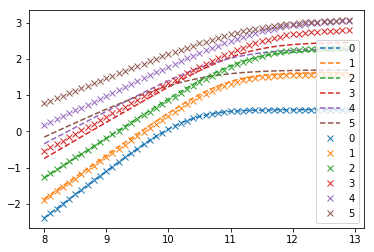

In [70]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
X = np.arange(8, 13, 0.1)
"""
for idx, z in enumerate([0,1,2,3,4,5]):
    plt.plot(X, SFR_t(X, z = z), "s", label = z, color = colours[idx], mfc = "None")
for idx, z in enumerate([0,1,2,3,4,5]):
    plt.plot(X, SFR_t_fit(X, z = z), "--", label = z, color = colours[idx])
plt.show()

"""
for idx, z in enumerate([0,1,2,3,4,5]):
    plt.plot(X, SFR_t_fit(X, z = z), "--", label = z, color = colours[idx])
for idx, z in enumerate([0,1,2,3,4,5]):
    plt.plot(X, SFR_t_alt(X, z = z), "x", label = z, color = colours[idx])
plt.legend(loc = 4)
plt.show()

In [ ]:
def SFR_S15(SM, z = 0.1):
    m = SM-9; r = np.log10(1+z)
    m0, a0, a1, m1, a2 = 0.5, 1.5, 0.3, 0.36, 2.5
    thing = m-m1-a2*r
    thing[thing<0] = 0
    return m-m0+a0*r-a1*np.power(thing, 2)

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 14})
mpl.rcParams.update({'lines.linewidth': 2})
mpl.rcParams.update({'lines.markersize': 5})
z = 1
X = np.arange(8, 13, 0.1)
plt.plot(X, SFR_S15(X, z = z), "-b", label = "S15")
plt.plot(X, SFR_t_fit(X, z = z), "-k", label = "CE")
plt.plot(X, SFR_t(X, z = z), "--r", label = "T16")
plt.ylim(-2, 3)
plt.xlabel("$M_* [M_{\odot}]$")
plt.ylabel("$log_{10} SFR [M_{\odot} yr^{-1}]$")
plt.text(12, -1.5, "z = {}".format(z))
plt.legend(frameon = False)
plt.tight_layout()
plt.savefig("./Figures_For_Paper_Final/SFR_Functions.png", bbox_inches='tight')
plt.savefig("./Figures_For_Paper_Final/SFR_Functions.pdf", bbox_inches='tight')
plt.savefig("./Figures_For_Paper_Final/SFR_Functions.eps", bbox_inches='tight')
plt.show()

In [ ]:
#Add other starformation rates 
X = np.arange(8, 13, 0.1)
Z = np.arange(0, 5, 1)

for z_ in Z:
    plt.plot(X, SFR_t_fit(X, z = z_), "-", label = z_)
    plt.plot(X, SFR_t(X, z = z_), "--", label = z_)
plt.ylim(-4, 5)
plt.ylim(-4, 5)
plt.legend(ncol =4, loc = 4)
plt.xlabel("$M_* [M_{\odot}]$")
plt.ylabel("$log_{10} SFR [M_{\odot} yr^{-1}]$")
plt.xlabel("$M_* [M_{\odot}]$")
plt.ylabel("$log_{10} SFR [M_{\odot} yr^{-1}]$")
plt.show()

Leja_in = np.loadtxt("fig6_pars.txt")
z_l = Leja_in[:,0]
b_l = Leja_in[:,1]
a1_l = Leja_in[:,2]
a2_l = Leja_in[:,3]

x = z_l
y = a1_l
A1 = np.polyfit(x,y, 3)
print("A1")
print(A1)
A1_m = np.polyfit([0.4, 2.3],[-2.5,0.5], 1)
print("A1_m")
print(A1_m)
y = a2_l
A2 = np.polyfit(x, y, 1)
print("A2")
print(A2)
y= b_l
B = np.polyfit(x, y, 3)
print("B")
print(B)
def Alpha1(x):
    y = A1[3] +  (A1[2]*x) + (A1[1]*x**2) + (A1[0]*x**3)
    return y
def Alpha1_merger(x):
    y = A1_m[1] +  (A1_m[0]*x)
    return y
def Alpha2(x):
    y = A2[1]+A2[0]*x
    return y
def Beta(x):
    y = B[3] + (B[2]*x) + (B[1]*x**2) + (B[0]*x**3)
    return y 

def SFR_t_corr(M_out, z = 0.5):
    s0 = 0.195 + 1.157*(z) - 0.143*(z**2)
    if z < 0.5:
        logM0 = 9.244 + 0.753*(0.5) - 0.09*(0.5**2)
    else:
        logM0 = 9.244 + 0.753*(z) - 0.09*(z**2)
    Gamma = -1.118 #including -ve here to avoid it later
    log10MperY = s0 - np.log10(1 + np.power(np.power(10, (M_out - logM0) ), Gamma))
    return log10MperY

def SFR_t_ten(M_out, z = 0.5):
    s0 = 0.195 + 1.157*(z) - 0.143*(z**2)
    logM0 = 10.5
    Gamma = -1.118 #including -ve here to avoid it later
    log10MperY = s0 - np.log10(1 + np.power(np.power(10, (M_out - logM0) ), Gamma))
    return log10MperY


def SFR_t(M_out, z = 0.5):
    s0 = 0.195 + 1.157*(z) - 0.143*(z**2)
    logM0 = 9.244 + 0.753*(z) - 0.09*(z**2)
    Gamma = -1.118 #including -ve here to avoid it later
    log10MperY = s0 - np.log10(1 + np.power(np.power(10, (M_out - logM0) ), Gamma))
    return log10MperY

#Leija15
def Leija15(M,z):
    A = np.full_like(M, Alpha1(z))
    A[M<10.5] = np.full_like(M[M<10.5], Alpha2(z))
    B = Beta(z)
    log10MperY = A*(M-10.5) + B
    return log10MperY#np.power(10, log10MperY)  
def Leija15_mergers(M,z):
    A = np.full_like(M, Alpha1_merger(z))
    A[M<10.5] = np.full_like(M[M<10.5], Alpha2(z))
    B = Beta(z)
    log10MperY = A*(M-10.5) + B
    return log10MperY#np.power(10, log10MperY)  

In [ ]:
h